import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
Plot correlation matrices

In [154]:
import sys
sys.path.append("../")
from nilearn.image import load_img
from src.utils import t_to_r
from scipy.spatial.distance import squareform
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

In [153]:
import matplotlib.font_manager
[f.name for f in matplotlib.font_manager.fontManager.ttflist]


['DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'STIXGeneral',
 'cmr10',
 'cmss10',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'cmex10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'cmmi10',
 'STIXSizeOneSym',
 'DejaVu Serif Display',
 'cmtt10',
 'Verdana',
 'Trebuchet MS',
 'DejaVu Serif',
 'Nimbus Mono PS',
 'URW Gothic',
 'Norasi',
 'Nimbus Mono PS',
 'KacstLetter',
 'Times New Roman',
 'Kinnari',
 'Nimbus Sans Narrow',
 'Rachana',
 'Ubuntu Mono',
 'Purisa',
 'Webdings',
 'Trebuchet MS',
 'Liberation Mono',
 'Ubuntu Mono',
 'Lohit Bengali',
 'Liberation Mono',
 'Liberation Serif

In [178]:
final_subjects = np.loadtxt("../data/subjects_intersect_motion_035.txt")
# Atlas
atlas_img = load_img("../data/atlases/shen_2mm_268_parcellation.nii.gz")
shen_rsns = pd.read_csv("../data/atlases/shen_268_parcellation_networklabels.csv")
shen_rsns.head()

rsn_lables = ['medial-frontal', 'frontoparietal', 'default-mode','subcortical-cerebellum',
              'motor', 'visual-1', 'visual-2', 'visual-association']
print(rsn_lables)
# Add colours to each network (R, G, B)
rsn_colors = [[128,0,128], [0,255,255], [255,215,0], [255,69,0],
              [0,0,128], [255,0,255], [0,255,0], [128,0,0]
             ]
print(rsn_colors)

rsn_norm_colors = [(rgb[0]/255, rgb[1]/255, rgb[2]/255) for rgb in rsn_colors]
rsn_cmap = ListedColormap(rsn_norm_colors)
print(rsn_cmap)

netassignments = shen_rsns.Network.to_numpy()
print(netassignments)

# Increasing order to rearrange matrices
indsort = shen_rsns.sort_values("Network").index.to_numpy()
print(indsort)

def stat_mat_figure(stat_mat):
    
    import matplotlib as mpl
    from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
    from nilearn.plotting import cm as ni_cm
    from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

    n = stat_mat.shape[0]
    
    #stat_mat = squareform(squareform(stat_mat, checks=False))
    stat_mat_sorted = stat_mat[indsort,:][:, indsort.T]
    
    #vmin = -1 #np.min(stat_mat_sorted)
    #vmax = 1 #np.max(stat_mat_sorted)
    
    vmin = np.min(squareform(stat_mat_sorted, checks=False))
    vmax = np.max(squareform(stat_mat_sorted, checks=False))
    
    norm = mpl.colors.TwoSlopeNorm(vmin= vmin,  vcenter=0, vmax = vmax)

    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    yhax = divider.append_axes("right", size=0.5, pad = 0.01)
    xhax = divider.append_axes("top", size=0.5, pad = 0)

    #im = ax.imshow(stat_mat_sorted, aspect='equal', cmap=nilearn_cmaps['cold_white_hot'], norm=norm)
    #im = ax.imshow(stat_mat_sorted, aspect='equal', cmap=plt.cm.RdBu_r, norm=norm)
    im = ax.imshow(stat_mat_sorted, aspect='equal', cmap=nilearn_cmaps['cyan_orange'], norm=norm)

    yhax.imshow(netassignments[indsort].astype(int).reshape(-1, 1), aspect=0.05,
                cmap=rsn_cmap)
    yhax.set_xticks([])
    yhax.set_yticks([])
    xhax.imshow(netassignments[indsort].astype(int).reshape(1, -1), aspect=1/0.05,
                cmap=rsn_cmap)
    xhax.set_xticks([])
    xhax.set_yticks([])

    unique_rsn, vcount = np.unique(netassignments, return_counts=True)

    y_o = 0

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Regions", fontsize = 25)
    ax.tick_params(axis="both", labelsize=20)
    yhax.set_axis_off()
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', fraction=.04, pad=0.1)
    cbar.ax.set_xlabel('Pearson ' + r'$\it{r}$', fontsize=25, fontweight='bold', labelpad=10)
    cbar.ax.tick_params(labelsize=12)
    return fig, ax


['medial-frontal', 'frontoparietal', 'default-mode', 'subcortical-cerebellum', 'motor', 'visual-1', 'visual-2', 'visual-association']
[[128, 0, 128], [0, 255, 255], [255, 215, 0], [255, 69, 0], [0, 0, 128], [255, 0, 255], [0, 255, 0], [128, 0, 0]]
[2 4 3 2 3 3 2 2 2 1 4 1 3 2 4 1 2 4 2 4 2 2 5 5 5 5 5 4 4 2 2 4 5 5 5 4 5
 5 5 5 8 6 8 4 5 5 2 2 3 3 5 1 1 1 2 1 1 5 8 5 5 5 5 1 1 8 8 6 8 2 8 6 8 8
 6 7 6 7 6 6 7 6 4 5 3 3 6 4 5 3 4 5 4 4 4 3 5 6 4 7 4 7 4 4 4 4 4 4 5 4 2
 2 4 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 1 3 2 1 3 2 2 4 1 4 2 1
 1 1 1 4 1 2 4 1 2 5 5 5 5 1 5 2 1 5 5 5 4 5 5 5 5 5 8 6 8 4 5 5 5 2 1 2 1
 1 1 5 5 1 5 1 2 1 5 2 5 6 2 8 8 5 3 8 6 8 6 6 8 8 6 7 7 7 6 6 4 5 1 4 4 3
 3 4 3 4 3 5 4 4 4 4 4 4 5 4 4 4 3 8 7 2 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4]
[164  52  51 147 193 148 191 161 189 185 184 149 182 150 152 186 218  53
 155  56  15 144  11 139   9  55  63  64 136 153 110 111  69 115  54 138
 141 146 142  46  47   0 163 246 245   3 241   6   7   8 156 

Compute correlation matrices...

In [3]:
cors_stroop = dict()
for cond in ['constant', 'Congruent', 'Incongruent']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-stroop/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    
    stat_cond_r = squareform(np.apply_along_axis(func1d = t_to_r, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1)) # df = # Subjects -1
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    cors_stroop[cond] = stat_cond_r

cors_msit = dict()
for cond in ['constant', 'Congruent', 'Incongruent']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-msit/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    stat_cond_r = squareform(np.apply_along_axis(func1d = t_to_r, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1 ))
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    cors_msit[cond] = stat_cond_r

cors_rest = dict()
for cond in ['constant']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-rest/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    stat_cond_r = squareform(np.apply_along_axis(func1d = t_to_r, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1 ))
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    cors_rest[cond] = stat_cond_r


In [4]:
def cohen(t, df):
    return t/np.sqrt(df)

In [5]:
d_stroop = dict()
for cond in ['constant', 'Congruent', 'Incongruent']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-stroop/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    
    stat_cond_r = squareform(np.apply_along_axis(func1d = cohen, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1)) # df = # Subjects -1
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    d_stroop[cond] = stat_cond_r

d_msit = dict()
for cond in ['constant', 'Congruent', 'Incongruent']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-msit/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    stat_cond_r = squareform(np.apply_along_axis(func1d = cohen, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1 ))
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    d_msit[cond] = stat_cond_r

d_rest = dict()
for cond in ['constant']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-rest/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    stat_cond_r = squareform(np.apply_along_axis(func1d = cohen, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1 ))
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    d_rest[cond] = stat_cond_r

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

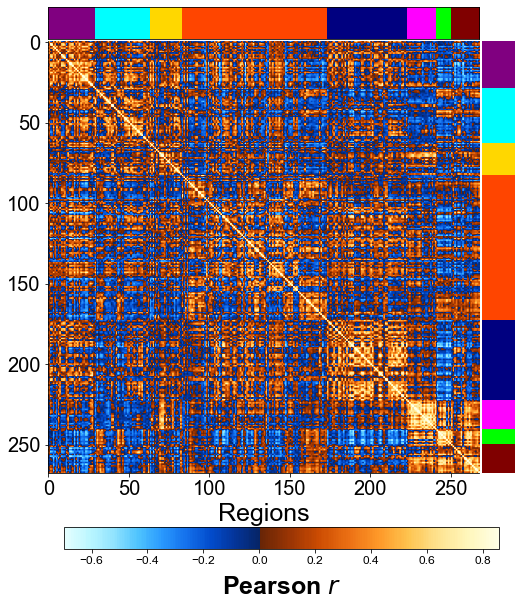

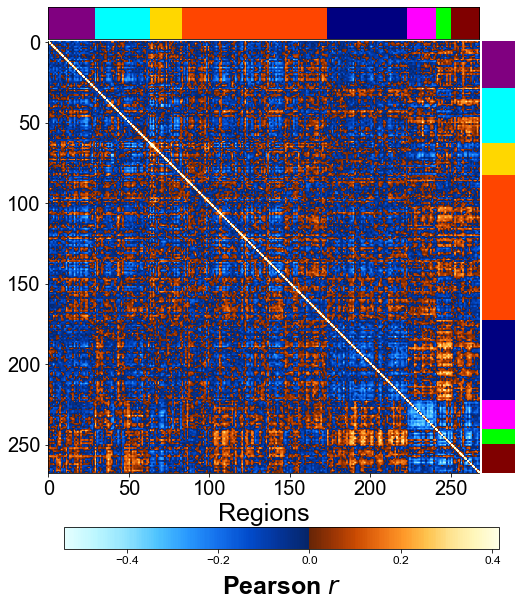

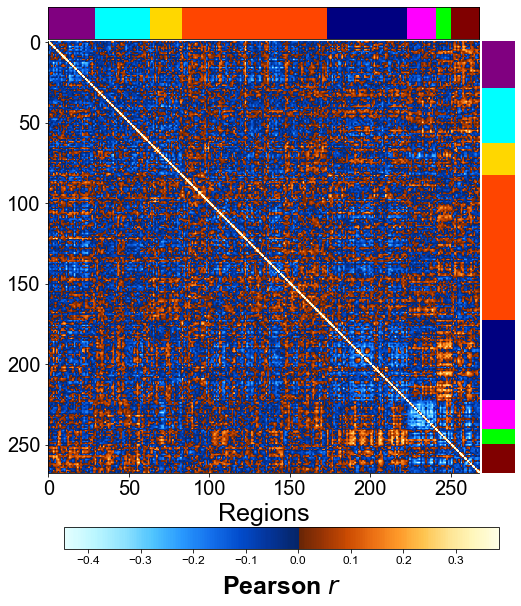

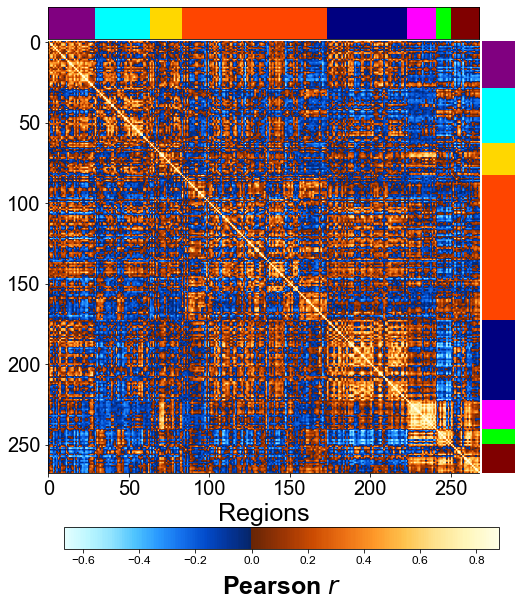

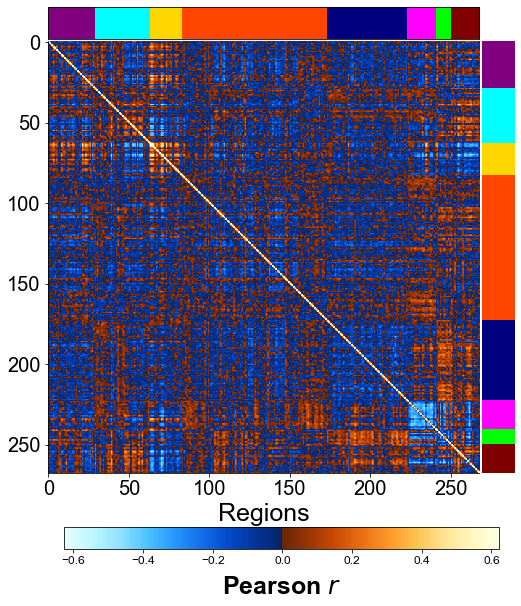

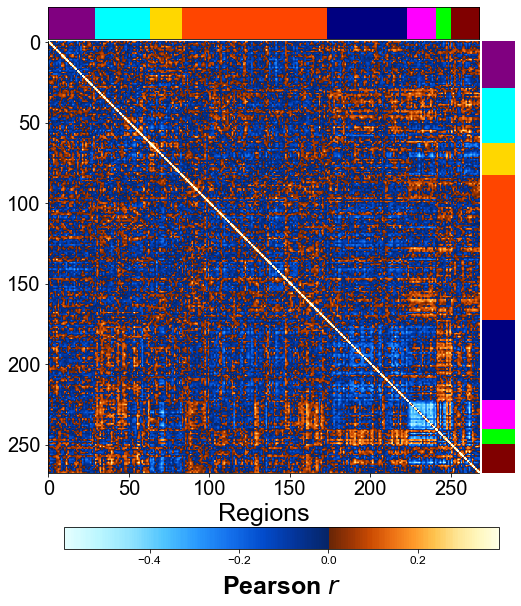

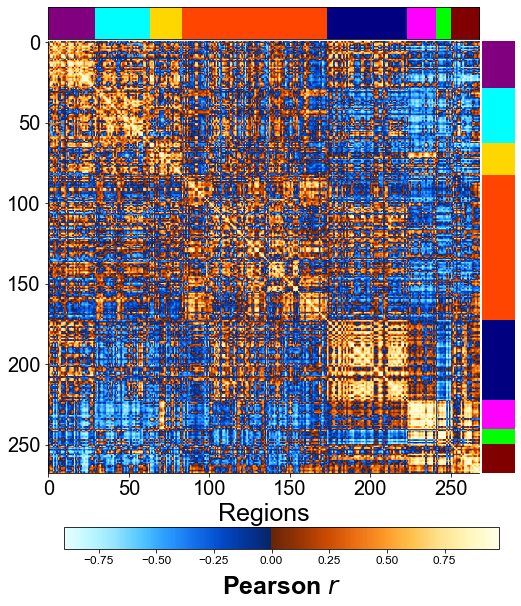

In [179]:
Path("../../plots/correlation_matrices").mkdir(exist_ok=True, parents=True)

for name, mat in cors_stroop.items():
    fig, _ = stat_mat_figure(mat)
    #fig.suptitle("stroop_" + name, size=20)
    basename = "../plots/correlation_matrices/stroop_cors_%s" % name.lower()
    fig.savefig(basename + ".png", dpi=300)
    fig.savefig(basename + ".pdf", dpi=300)
    fig.savefig(basename + ".svg", dpi=300)
    
for name, mat in cors_msit.items():
    fig, _ = stat_mat_figure(mat)
    #fig.suptitle("msit_" + name, size=20)
    basename = "../plots/correlation_matrices/msit_cors_%s" % name.lower()
    fig.savefig(basename + ".png", dpi=300)
    fig.savefig(basename + ".pdf", dpi=300)
    fig.savefig(basename + ".svg", dpi=300)
    
for name, mat in cors_rest.items():
    fig, _ = stat_mat_figure(mat)
    #fig.suptitle("rest_" + name, size=25)
    basename = "../plots/correlation_matrices/rest_cors_%s" % name.lower()
    fig.savefig(basename + ".png", dpi=300)
    fig.savefig(basename + ".pdf", dpi=300)
    fig.savefig(basename + ".svg", dpi=300)

Compute correlations

In [5]:
corrs_df = dict()
for name, mat in cors_stroop.items():
    name = "stroop_" + name
    corrs_df[name] = squareform(mat, checks=False)
for name, mat in cors_msit.items():
    name = "msit_" + name
    corrs_df[name] = squareform(mat, checks=False)
for name, mat in cors_rest.items():
    name = "rest_" + name
    corrs_df[name] = squareform(mat, checks=False)
    
corrs_df = pd.DataFrame(corrs_df)
np.round(corrs_df.corr(method='spearman'), 2)

stroop_constant  stroop_Congruent  stroop_Incongruent  \
stroop_constant                1.00             -0.63               -0.31   
stroop_Congruent              -0.63              1.00                0.69   
stroop_Incongruent            -0.31              0.69                1.00   
msit_constant                  0.92             -0.47               -0.19   
msit_Congruent                -0.28              0.48                0.28   
msit_Incongruent              -0.10              0.31                0.48   
rest_constant                  0.81             -0.34               -0.17   

                    msit_constant  msit_Congruent  msit_Incongruent  \
stroop_constant              0.92           -0.28             -0.10   
stroop_Congruent            -0.47            0.48              0.31   
stroop_Incongruent          -0.19            0.28              0.48   
msit_constant                1.00           -0.43             -0.30   
msit_Congruent              -0.43            1.00              0.74   
msit_Incongruent            -0.30            0.74              1.00   
rest_constant                0.83           -0.14             -0.12   

                    rest_constant  
stroop_constant              0.81  
stroop_Congruent            -0.34  
stroop_Incongruent          -0.17  
msit_constant                0.83  
msit_Congruent              -0.14  
msit_Incongruent            -0.12  
rest_constant                1.00

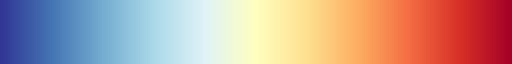

In [98]:
from nilearn.plotting import cm as nicm
from nilearn.plotting.cm import cold_white_hot
plt.cm.RdYlBu_r


{0: Text(1.0, 8.514948963609798e-09, '0'),
 1: Text(0.6234898099391866, 0.7818314848003564, '1'),
 2: Text(-0.22252090581754597, 0.9749278775307834, '2'),
 3: Text(-0.9009687849123551, 0.4338838097407542, '3'),
 4: Text(-0.9009687849123551, -0.43388373310621353, '4'),
 5: Text(-0.22252096542218872, -0.9749278605008853, '5'),
 6: Text(0.6234896311252583, -0.7818315869797438, '6')}

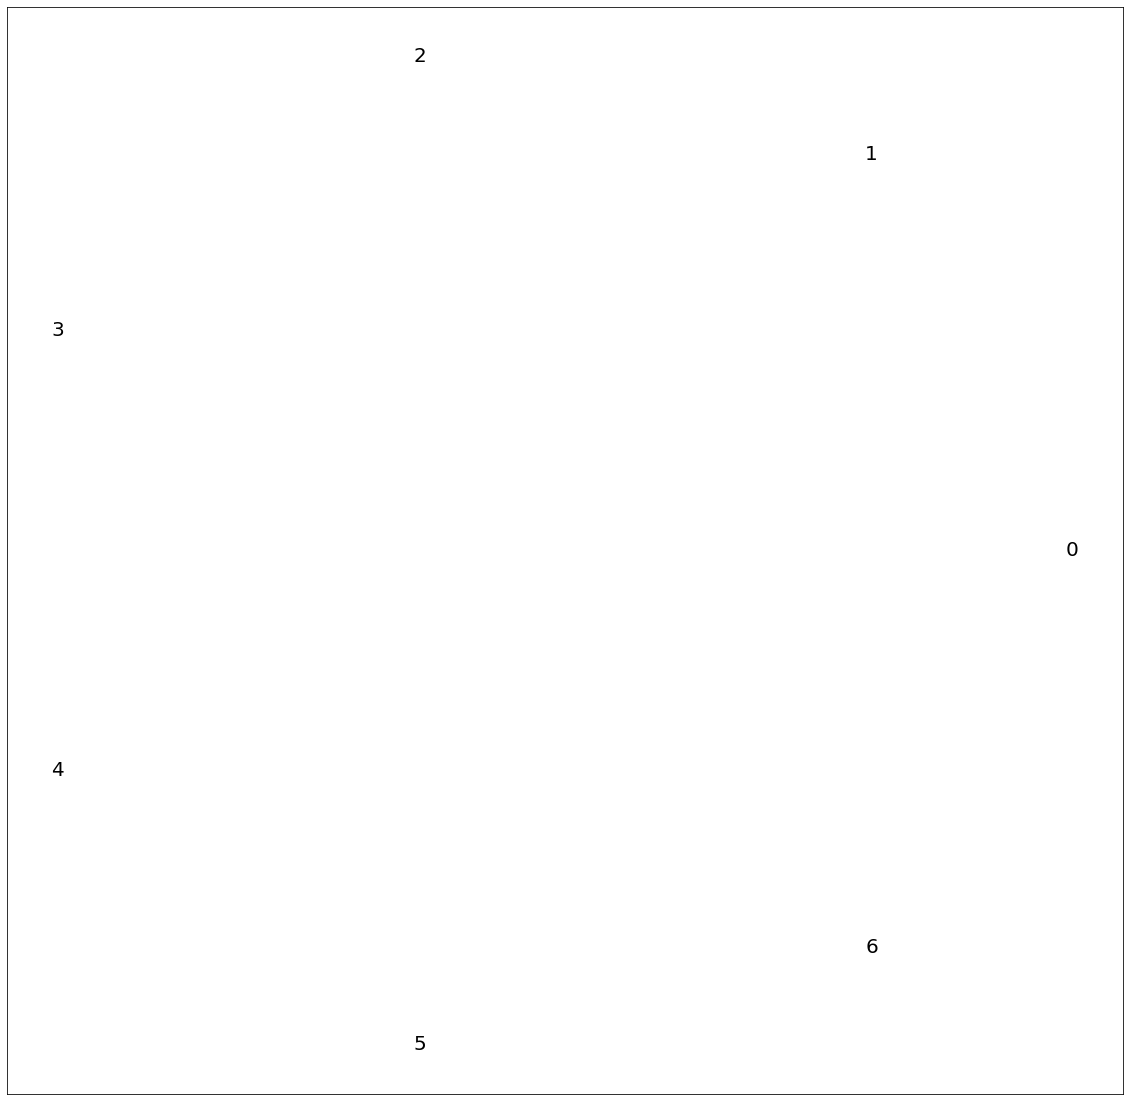

In [170]:
from sklearn.preprocessing import maxabs_scale
positions = nx.circular_layout(G)
#Figure size
plt.figure(figsize=(20,20))

#draws nodes
nx.draw_networkx_nodes(G,positions, node_color='#DA70D6',
                       node_size=0,alpha=0.8)
#Styling for labels
nx.draw_networkx_labels(G, positions, font_size=20, 
                        font_family='sans-serif')

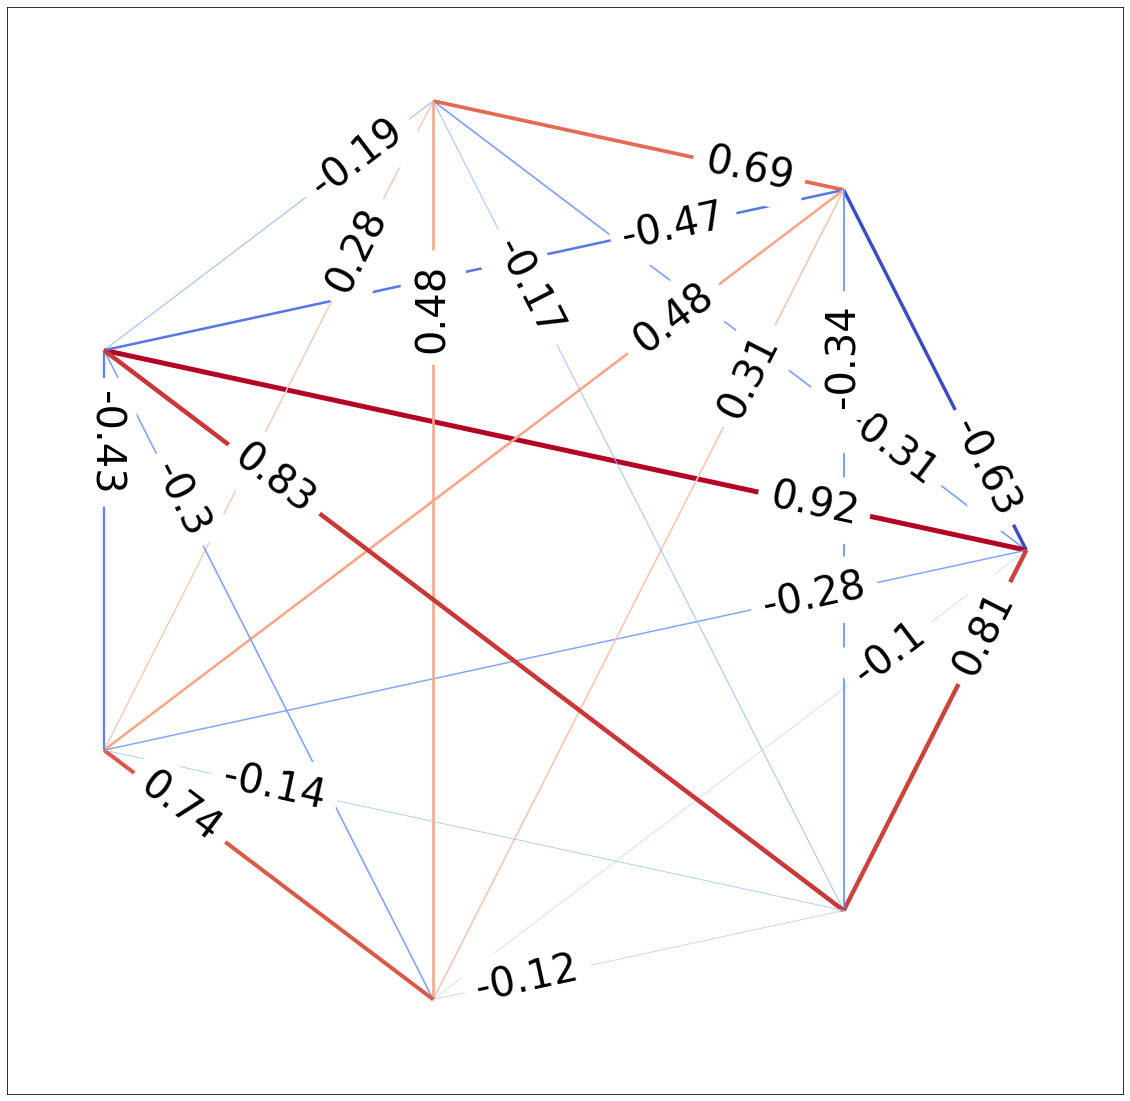

In [175]:
import networkx as nx
cor_mat = np.round(corrs_df.corr(method='spearman'), 2).to_numpy()
cor_mat[np.diag_indices(n=cor_mat.shape[1])] = 0
G = nx.from_numpy_matrix(cor_mat)
#relabels the nodes to match the  stocks names
#G = nx.relabel_nodes(G,lambda x: stocks[x])

#shows the edges with their corresponding weights
G.edges(data=True)

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

#positions
#angles = np.linspace(0, 2*np.pi, 7)
#positions = {}
#for ii in range(6):
 #   positions[ii] = np.array([np.cos(angles[ii]), np.sin(angles[ii])])

#positions[6] = np.array([0.,0])

positions = nx.circular_layout(G)
#Figure size
plt.figure(figsize=(20,20))

#draws nodes
nx.draw_networkx_nodes(G,positions, node_color='#DA70D6',
                       node_size=0,alpha=0.8)

#Styling for labels
nx.draw_networkx_labels(G, positions, font_size=0, 
                        font_family='sans-serif')

#draws the edges
nx.draw_networkx_edges(G, positions, style='solid', 
                       edge_color = weights,  width=5*np.abs(maxabs_scale(weights)),#np.abs(weights),
                       edge_cmap=plt.cm.coolwarm
                      )
nx.draw_networkx_edge_labels(G, positions, font_size=40,
                             edge_labels=nx.get_edge_attributes(G,'weight'), label_pos=0.77)
plt.savefig("../plots/graph_between_groupmats.png", bbox_inches="tight")
plt.savefig("../plots/graph_between_groupmats.svg", bbox_inches="tight")
plt.savefig("../plots/graph_between_groupmats.pdf", bbox_inches="tight")
pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

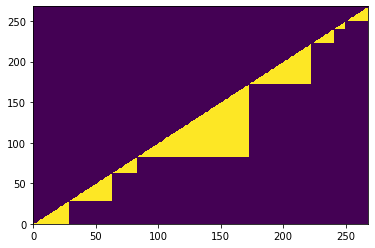

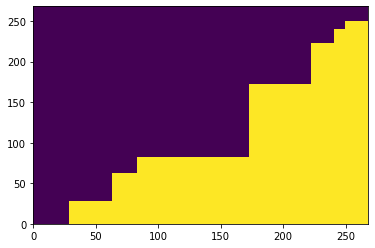

In [572]:
from nilearn.image import load_img

_, n_rois_rsn = np.unique(shen_rsns.Network, return_counts=True)
within_network = np.zeros((268, 268))
for ii, n_rois in enumerate(n_rois_rsn):
    if ii==0:
        i_0 = 0
    i_f = i_0 + n_rois
    within_network[i_0:i_f, :][:, i_0:i_f]=1
    i_0 = i_f
    
within_network[np.diag_indices_from(within_network)]=0
within_network[np.tril_indices_from(within_network, k=-1)]=0
within_network = within_network.astype(bool)
between_network = squareform(within_network[np.triu_indices_from(within_network, k=1)]==0)
between_network[np.tril_indices_from(between_network, k=-1)]=0
between_network = between_network.astype(bool)

plt.figure()
plt.pcolormesh(within_network)
plt.figure()
plt.pcolormesh(between_network)

def load_first_level_data(task_id, contrast):
    
    base_dir = "../../results/first-level/edge_gsr/shen/task-%s" % task_id

    pattern = base_dir + "/" + "sub-%d" + "/" +  contrast + "/" + "effect_size.nii.gz"
    list_ef = [squareform(np.squeeze(load_img(pattern % subj).get_fdata()), checks=False) \
                     for subj in final_subjects]
    list_ef = [squareform(ef) for ef in list_ef]
    return list_ef
    
    
def compute_network_stat(task_id, summary = np.median):
     
    between_dict = dict()
    within_dict = dict()
    differences_dict = dict()
    
    if task_id=="rest":
        contrasts = ["constant"]
    else:
        contrasts = ["constant", "Congruent", "Incongruent"]
        
    for case in contrasts:
        list_ef = load_first_level_data(task_id=task_id, contrast=case)
        
        within_cohen = [summary(ef[within_network]) for ef in list_ef]
        within_dict[case] = within_cohen
        
        between_cohen = [summary(ef[between_network]) for ef in list_ef]
        between_dict[case] = between_cohen
        
        differences = [summary(ef[within_network]) - summary(ef[between_network]) for ef in list_ef]
        differences_dict[case] = differences

    within_df = pd.DataFrame(within_dict)
    within_df['task'] = task_id
    within_df['conn'] = "within"
    
    between_df = pd.DataFrame(between_dict)
    between_df['task'] = task_id
    between_df['conn'] = "between"
    
    differences_df = pd.DataFrame(differences_dict)
    differences_df['task'] = task_id
    differences_df['conn'] = "differences"
    
    return (pd.melt(within_df, id_vars = ["task", "conn"]), 
            pd.melt(between_df, id_vars = ["task", "conn"]),
            pd.melt(differences_df, id_vars = ["task", "conn"]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

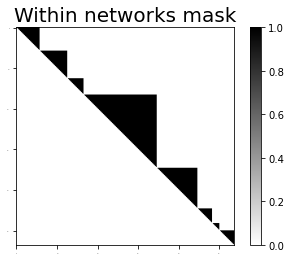

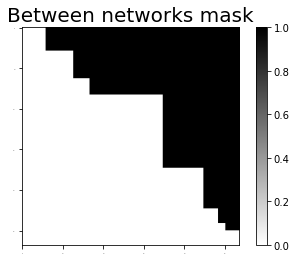

In [513]:
plt.figure()
plt.imshow(within_network, cmap=plt.cm.binary)
plt.title("Within networks mask", size=20)
plt.colorbar()
plt.tick_params(labelsize=0)
plt.figure()
plt.imshow(between_network, cmap=plt.cm.binary)
plt.title("Between networks mask",size=20)
plt.tick_params(labelsize=0)

plt.colorbar()

In [622]:
within_ef_stroop, between_ef_stroop, diff_ef_stroop = compute_network_stat(task_id="stroop")
within_ef_stroop['task'] = "Stroop"
between_ef_stroop['task'] = "Stroop"

within_ef_msit, between_ef_msit, diff_ef_msit = compute_network_stat(task_id="msit")
within_ef_msit['task'] = "MSIT"
between_ef_msit['task'] = "MSIT"

within_ef_rest, between_ef_rest, diff_ef_rest = compute_network_stat(task_id="rest")
within_ef_rest['task'] = "Rest"
between_ef_rest['task'] = "Rest"
master_df = pd.concat([within_ef_stroop, 
                       between_ef_stroop, 
                       within_ef_msit, 
                       between_ef_msit,
                       within_ef_rest,
                       between_ef_rest])
master_df

task     conn  variable     value
0    Stroop   within  constant  0.028718
1    Stroop   within  constant  0.028776
2    Stroop   within  constant  0.064764
3    Stroop   within  constant  0.012395
4    Stroop   within  constant  0.010415
..      ...      ...       ...       ...
237    Rest  between  constant -0.000262
238    Rest  between  constant -0.006044
239    Rest  between  constant  0.012243
240    Rest  between  constant  0.001984
241    Rest  between  constant -0.002937

[3388 rows x 4 columns]

In [582]:
from scipy.stats import ttest_1samp
ttest_1samp(diff_ef_stroop[diff_ef_stroop.variable=='Congruent'].value, popmean=0)


Ttest_1sampResult(statistic=-5.759058240228589, pvalue=2.5660636562866334e-08)

In [598]:
rng = np.random.RandomState(0)
rng.choice?

In [599]:
from sklearn.utils import column_or_1d
column_or_1d?

In [613]:
def boot_ci(x, n_boots = 1000, alpha=0.05, func=np.mean, random_state=None):
    
    import numpy as np
    from sklearn.utils import column_or_1d
    
    x = column_or_1d(x)
    n_boots = int(n_boots)
    rng = np.random.RandomState(random_state)
    
    n_obs = len(x)
    idxs = np.arange(n_obs)
    
    stat_boots = np.zeros(n_boots)
    for ii in range(n_boots):
        idxs_boot = rng.choice(idxs, size=n_obs)
        x_boot = x[idxs_boot]
        
        stat_boots[ii] = func(x_boot)
        
    l,u = np.quantile(stat_boots, q=[alpha/2, 1-alpha/2])
    
    return l, u


boot_ci(diff_ef_stroop[diff_ef_stroop.variable=='constant'].value, alpha=0.05, random_state=0, n_boots=1e4)

(0.020461182014110114, 0.023662230201336204)

In [648]:
def boot_ci_bca(x, n_boots = 1000, alpha=0.05, func=np.mean, random_state=None):
    
    import numpy as np
    from sklearn.utils import column_or_1d
    from scipy.stats import norm

    x = column_or_1d(x)
    n_boots = int(n_boots)
    rng = np.random.RandomState(random_state)
    
    n_obs = len(x)
    idxs = np.arange(n_obs)
    
    stat_obs = func(x)
    stat_boots = np.zeros(n_boots)
    for ii in range(n_boots):
        idxs_boot = rng.choice(idxs, size=n_obs)
        x_boot = x[idxs_boot]
        
        stat_boots[ii] = func(x_boot)
    
    # Compute bias 
    z_o = norm.ppf(sum(stat_obs<stat_boots)/n_boots)
    
    # Acceleration
    jacknife_obs = np.array([func(x[idxs!= ii]) for ii in range(n_obs)])
    jacknife_avg = np.mean(jacknife_obs)
    
    num = sum((jacknife_avg-jacknife_obs)**3)
    den = 6*((sum((jacknife_avg-jacknife_obs)**2))**1.5)
    a = num/den
    
    zl = norm.ppf(alpha/2)
    zu = norm.ppf(1-alpha/2)
    
    alpha_1 = norm.cdf(z_o + (z_o + zl)/(1-a*(z_o + zl)))
    alpha_2 = norm.cdf(z_o + (z_o + zu)/(1-a*(z_o + zu)))
    
    l,u = np.quantile(stat_boots, q=[alpha_1, alpha_2])
    
    return l, u

In [662]:
print(boot_ci(diff_ef_stroop[diff_ef_stroop.variable=='Incongruent'].value, 
              func=np.median,
              alpha=0.05, random_state=0, n_boots=1e4))
print(boot_ci_bca(diff_ef_stroop[diff_ef_stroop.variable=='Incongruent'].value, 
                  func=np.median,
                  alpha=0.05, random_state=0, n_boots=1e4))

(-0.0032122561729146697, 7.166296121914389e-05)
(-0.0032330375184555244, -4.0435731924595274e-05)


In [630]:
import dabest
dabest.load(pd.concat([within_ef_stroop[within_ef_stroop.variable=='Congruent'].value, 
                       between_ef_stroop[between_ef_stroop.variable=='Congruent'].value, axis=1

242    0.004767
243    0.010508
244   -0.036884
245    0.005737
246    0.009399
         ...   
479   -0.001649
480   -0.006581
481   -0.047048
482   -0.006488
483   -0.028332
Name: value, Length: 242, dtype: float64

In [671]:
master_df

task     conn  variable     value
0    Stroop   within  constant  0.028718
1    Stroop   within  constant  0.028776
2    Stroop   within  constant  0.064764
3    Stroop   within  constant  0.012395
4    Stroop   within  constant  0.010415
..      ...      ...       ...       ...
237    Rest  between  constant -0.000262
238    Rest  between  constant -0.006044
239    Rest  between  constant  0.012243
240    Rest  between  constant  0.001984
241    Rest  between  constant -0.002937

[3388 rows x 4 columns]

In [672]:
master_df = pd.concat([diff_ef_stroop, 
                       diff_ef_msit, 
                       diff_ef_rest])
master_df

task         conn  variable     value
0    stroop  differences  constant  0.006964
1    stroop  differences  constant  0.006246
2    stroop  differences  constant  0.014107
3    stroop  differences  constant  0.017984
4    stroop  differences  constant  0.003813
..      ...          ...       ...       ...
237    rest  differences  constant  0.024468
238    rest  differences  constant  0.025863
239    rest  differences  constant  0.029680
240    rest  differences  constant  0.013517
241    rest  differences  constant  0.023544

[1694 rows x 4 columns]

In [688]:
ax.

<AxesSubplot:title={'center':'variable = constant | task = stroop'}>

In [693]:
sns.kdeplot?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

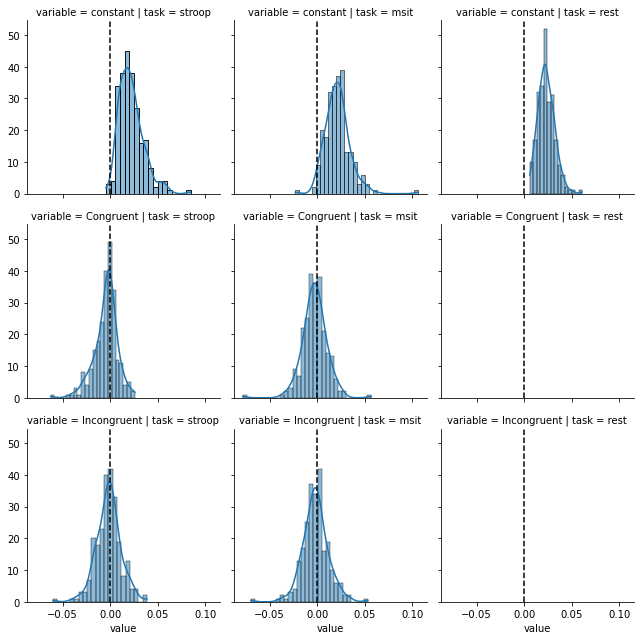

In [707]:
g = sns.FacetGrid(row='variable', col="task", data=master_df)
g.map_dataframe(sns.histplot, "value", kde=True)
for ax in g.axes.flatten():
    ymin, ymax = ax.get_ylim()
    ax.axvline(0, ymin=ymin, ymax=ymax, linestyle='--', color="black")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

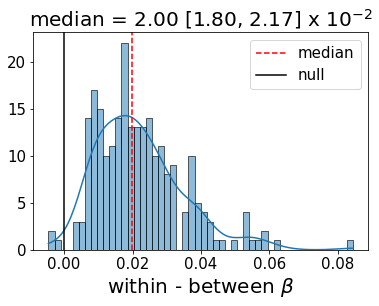

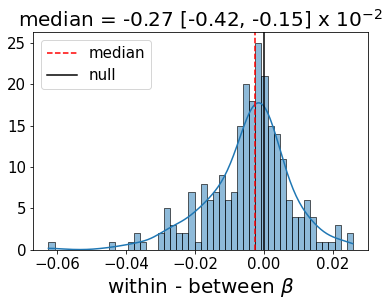

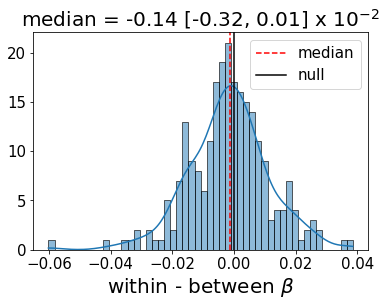

In [749]:
df = diff_ef_stroop
for case in ['constant', "Congruent", "Incongruent"]:
    fig, ax = plt.subplots()
    sns.histplot(df[df.variable==case].value, kde=True, ax=ax,bins=50)
    ymin, ymax = ax.get_ylim()
    
    obs = np.median(df[df.variable==case].value)
    l,u = boot_ci(df[df.variable==case].value.to_numpy(), func=np.median, random_state=0, n_boots=10000)
    
    ax.axvline(obs, ymin, ymax, color='red', linestyle='--', label="median")
    ax.axvline(0, ymin, ymax, color='black', label="null")
    ax.set_xlabel(r"within - between $\beta$", size=20)
    ax.set_ylabel("")
    ax.legend(fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_title(r"median = %.2f [%.2f, %.2f] x $10^{-2}$" % (obs*100, l*100, u*100), size=20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

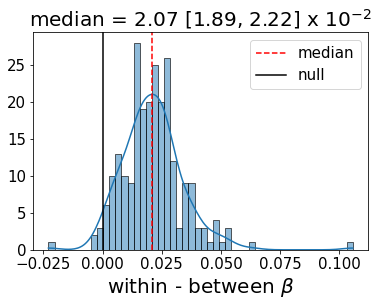

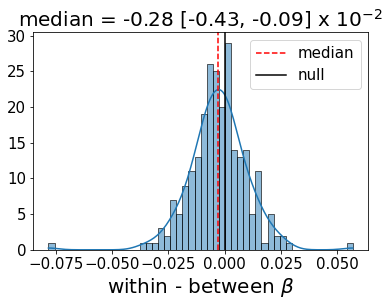

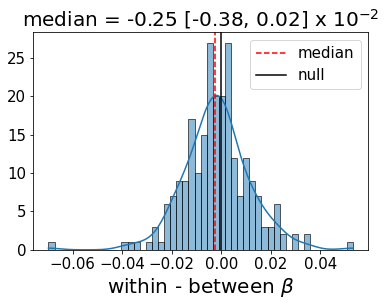

In [750]:
df = diff_ef_msit
for case in ['constant', "Congruent", "Incongruent"]:
    fig, ax = plt.subplots()
    sns.histplot(df[df.variable==case].value, kde=True, ax=ax,bins=50)
    ymin, ymax = ax.get_ylim()
    
    obs = np.median(df[df.variable==case].value)
    l,u = boot_ci(df[df.variable==case].value.to_numpy(), func=np.median, random_state=0, n_boots=10000)
    
    ax.axvline(obs, ymin, ymax, color='red', linestyle='--', label="median")
    ax.axvline(0, ymin, ymax, color='black', label="null")
    ax.set_xlabel(r"within - between $\beta$", size=20)
    ax.set_ylabel("")
    ax.legend(fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_title(r"median = %.2f [%.2f, %.2f] x $10^{-2}$" % (obs*100, l*100, u*100), size=20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

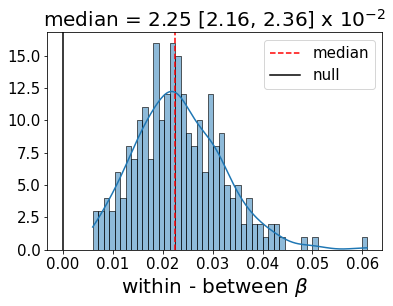

In [751]:
df = diff_ef_rest
for case in ['constant']:
    fig, ax = plt.subplots()
    sns.histplot(df[df.variable==case].value, kde=True, ax=ax,bins=50)
    ymin, ymax = ax.get_ylim()
    
    obs = np.median(df[df.variable==case].value)
    l,u = boot_ci(df[df.variable==case].value.to_numpy(), func=np.median, random_state=0, n_boots=10000)
    
    ax.axvline(obs, ymin, ymax, color='red', linestyle='--', label="median")
    ax.axvline(0, ymin, ymax, color='black', label="null")
    ax.set_xlabel(r"within - between $\beta$", size=20)
    ax.set_ylabel("")
    ax.legend(fontsize=15)
    ax.tick_params(labelsize=15)
    ax.set_title(r"median = %.2f [%.2f, %.2f] x $10^{-2}$" % (obs*100, l*100, u*100), size=20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 1.,  1.,  4.,  9., 39., 74., 73., 27., 12.,  2.]),
 array([-0.06017245, -0.05030009, -0.04042772, -0.03055536, -0.020683  ,
        -0.01081063, -0.00093827,  0.00893409,  0.01880645,  0.02867882,
         0.03855118]),
 <BarContainer object of 10 artists>)

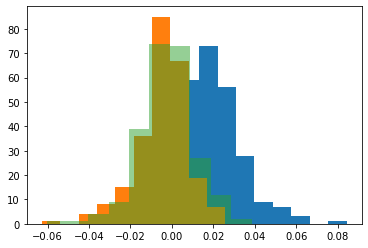

In [624]:
plt.hist(diff_ef_stroop[diff_ef_stroop.variable=='constant'].value)
plt.hist(diff_ef_stroop[diff_ef_stroop.variable=='Congruent'].value)
plt.hist(diff_ef_stroop[diff_ef_stroop.variable=='Incongruent'].value, alpha=0.5)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

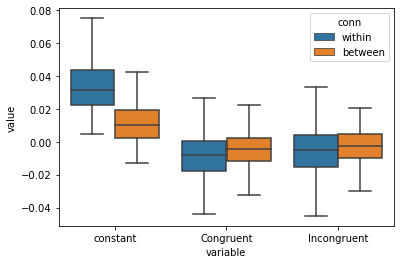

In [480]:
sns.boxplot(x='variable', 
              y='value', hue='conn',
              data = pd.concat([within_ef_stroop, between_ef_stroop]),
              dodge=True, showfliers=False)

<IPython.core.display.Javascript object>

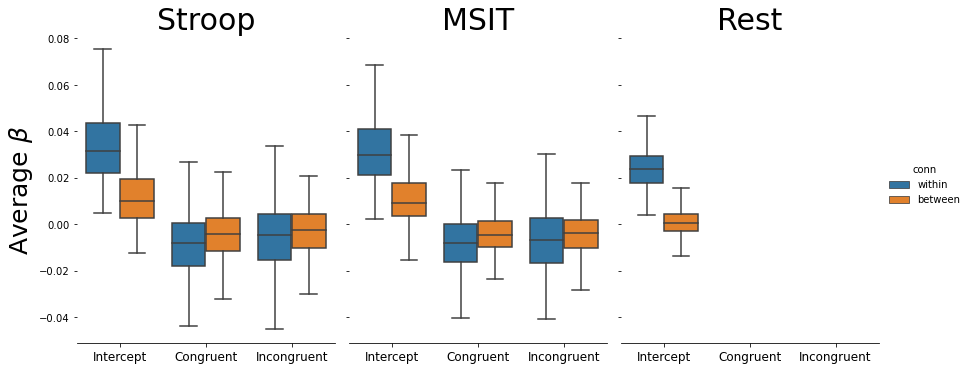

In [482]:
g = sns.catplot(x="variable", y="value", hue="conn",
                col="task", data=master_df,kind="box",
                height=5, aspect=.8, showfliers=False)
(g.set_axis_labels("", r"Average $\beta$", size=25)
  .set_xticklabels(["Intercept", "Congruent", "Incongruent"], size=12)
  .set_titles('{col_name}', size=30)
  .despine(left=True))  

In [571]:
within_ef_stroop

task    conn     variable     value
0    Stroop  within     constant  0.028718
1    Stroop  within     constant  0.028776
2    Stroop  within     constant  0.064764
3    Stroop  within     constant  0.012395
4    Stroop  within     constant  0.010415
..      ...     ...          ...       ...
721  Stroop  within  Incongruent  0.000423
722  Stroop  within  Incongruent -0.006936
723  Stroop  within  Incongruent -0.045969
724  Stroop  within  Incongruent  0.013781
725  Stroop  within  Incongruent -0.031082

[726 rows x 4 columns]

In [663]:
np.savetxt("a.txt", within_ef_stroop[within_ef_stroop.variable=="Congruent"].value.to_numpy())
np.savetxt("b.txt", between_ef_stroop[between_ef_stroop.variable=="Congruent"].value.to_numpy())

In [670]:
boot_ci(diff_ef_stroop[diff_ef_stroop.variable=="Congruent"].value, func=np.mean, n_boots=10000)

(-0.006073031754686416, -0.0030673358505237903)

In [664]:
within_ef_stroop[within_ef_stroop.variable=="Congruent"].value.to_numpy() - between_ef_stroop[between_ef_stroop.variable=="Congruent"].value.to_numpy()

array([ 1.24754663e-02,  2.17183210e-02,  1.50825411e-03, -2.11690228e-03,
        1.12792848e-02, -4.43268875e-02, -9.39089739e-03, -1.45970664e-02,
        1.39193624e-02, -1.72077328e-02,  1.22618966e-02, -9.44816270e-04,
       -7.28202738e-03,  8.75591650e-04, -6.02308294e-03, -2.06179584e-03,
       -3.07000150e-02,  2.06314674e-03, -2.50860496e-03, -2.26815771e-03,
        5.33674203e-04,  7.18960774e-03, -4.54119890e-03, -1.13180201e-03,
        3.30750709e-03,  1.03733419e-02, -9.99902556e-03, -1.87257244e-03,
        4.87104192e-03, -1.80978353e-02, -1.07262864e-03, -1.32960222e-02,
       -6.66616718e-04,  7.48970843e-04,  2.09221287e-03, -5.72147650e-03,
       -3.35981220e-03,  1.14416851e-02, -2.09442928e-02, -3.86786831e-04,
        2.58333237e-02, -3.02740711e-03,  2.98265767e-03, -5.24621093e-03,
       -4.35563370e-03, -2.27867200e-02,  8.44792658e-03,  2.13060915e-02,
       -9.14674523e-03, -2.07063103e-02, -1.35933204e-02,  3.35794340e-03,
       -6.35200971e-03,  

In [522]:
from scipy.stats import wilcoxon, ttest_rel

test = ttest_rel
print(test)

print("STROOP")
for case in ['constant', 'Congruent', 'Incongruent']:

    print(case, "=", test(within_ef_stroop[within_ef_stroop.variable==case].value,
             between_ef_stroop[between_ef_stroop.variable==case].value)[1]*7)
print("")
print("MSIT")
for case in ['constant', 'Congruent', 'Incongruent']:

    print(case, "=",test(within_ef_msit[within_ef_msit.variable==case].value,
             between_ef_msit[between_ef_msit.variable==case].value)[1]*7)
print("")
print("Rest")
for case in ['constant']:

    print(case, "=", test(within_ef_rest[within_ef_rest.variable==case].value,
             between_ef_rest[between_ef_rest.variable==case].value)[1]*7)

<function ttest_rel at 0x7f1f6f883160>
STROOP
constant = 8.48475808644763e-73
Congruent = 1.7962445594006435e-07
Incongruent = 0.28257252359712526

MSIT
constant = 3.3329202001389218e-68
Congruent = 0.00929678967841806
Incongruent = 0.26651376865387183

Rest
constant = 3.4040727682325935e-111


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ValueError: Could not interpret input 'variable'

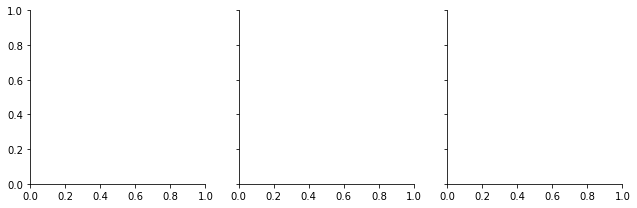

In [442]:
g = sns.FacetGrid(master_df, col="task")
g.map(sns.barplot, x="variable", y="value", hue="conn", order="variable")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

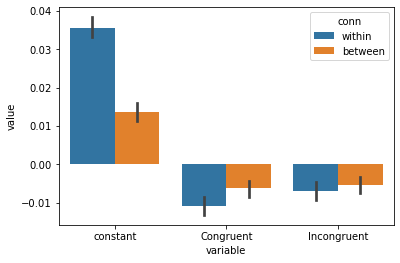

In [410]:
sns.barplot(x='variable', y='value', hue='conn', 
            data = pd.concat([pd.melt(within_ef_stroop, id_vars = ["task", "conn"]),
                       pd.melt(between_ef_stroop, id_vars = ["task", "conn"])]))

In [420]:
print(ttest_rel(within_ef_stroop.Congruent, between_ef_stroop.Congruent))
print(ttest_rel(within_ef_stroop.Incongruent, between_ef_stroop.Incongruent))

print(ttest_rel(within_ef_msit.Congruent, between_ef_msit.Congruent))
print(ttest_rel(within_ef_msit.Incongruent, between_ef_msit.Incongruent))

Ttest_relResult(statistic=-5.759058240228589, pvalue=2.5660636562866334e-08)
Ttest_relResult(statistic=-2.0610900003409083, pvalue=0.040367503371017896)
Ttest_relResult(statistic=-3.247876023081807, pvalue=0.00132811281120258)
Ttest_relResult(statistic=-2.0855318753160623, pvalue=0.03807339552198169)


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

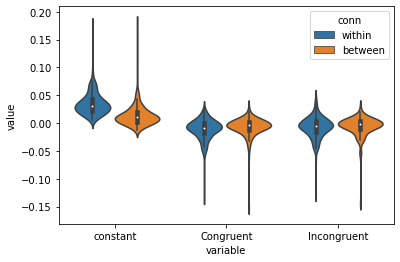

In [413]:
sns.violinplot(x='variable', y='value', hue='conn', 
            data = pd.concat([pd.melt(within_ef_stroop, id_vars = ["task", "conn"]),
                       pd.melt(between_ef_stroop, id_vars = ["task", "conn"])]), showfliers=False)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

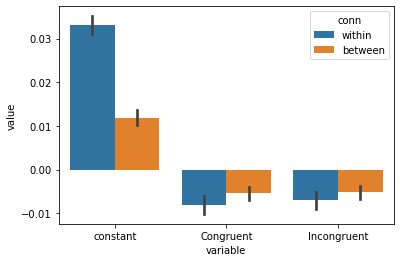

In [342]:
sns.barplot(x='variable', y='value', hue='conn', 
            data = pd.concat([pd.melt(within_ef_msit, id_vars = ["task", "conn"]),
                       pd.melt(between_ef_msit, id_vars = ["task", "conn"])]))

In [359]:
pattern = "../../results/edge_imgs_gsr/shen/task-rest/denoised_roi_time_series/sub-%d_ses-01_task-rest_space-MNI152NLin2009cAsym_desc-conf_roi.npy"

foo = [np.corrcoef(np.load(pattern % subj).T) for subj in final_subjects]


In [408]:
np.corrcoef(np.array(foo)[0,:,:].flatten(), a.flatten())

array([[1.        , 0.98784042],
       [0.98784042, 1.        ]])

In [406]:
a = np.squeeze(load_img("../../results/first-level/edge_gsr/shen/task-rest/sub-2049/constant/stat.nii.gz").get_fdata())
a = squareform(a, checks=False)
df = 150 -np.load("../../results/edge_imgs_gsr/shen/task-rest/denoising_mats/sub-2049_ses-01_task-rest_space-MNI152NLin2009cAsym_desc-denoise_mat.npy").shape[1]
a = np.apply_along_axis(t_to_r, axis=0, arr=a, df=df)
a = squareform(a)
a = a + np.eye(268)
a

array([[ 1.        ,  0.52173037,  0.43245333, ...,  0.00492   ,
         0.07677841, -0.07420127],
       [ 0.52173037,  1.        ,  0.38566145, ..., -0.19711351,
         0.06105745, -0.00185387],
       [ 0.43245333,  0.38566145,  1.        , ..., -0.07810536,
        -0.08558265,  0.20723451],
       ...,
       [ 0.00492   , -0.19711351, -0.07810536, ...,  1.        ,
        -0.07884805,  0.19072795],
       [ 0.07677841,  0.06105745, -0.08558265, ..., -0.07884805,
         1.        , -0.05453547],
       [-0.07420127, -0.00185387,  0.20723451, ...,  0.19072795,
        -0.05453547,  1.        ]])

In [379]:
np.mean(np.squeeze(load_img("../../results/edge_imgs_gsr/shen/task-rest/sub-1003_ses-01_task-rest_space-MNI152NLin2009cAsym_desc-edges_bold.nii.gz").get_fdata()), axis=2)

array([[ 0.        ,  0.21439225,  0.41735064, ...,  0.17085521,
         0.120953  ,  0.2350724 ],
       [ 0.21439225,  0.        ,  0.09561056, ...,  0.19475449,
        -0.1258985 ,  0.07990479],
       [ 0.41735064,  0.09561056,  0.        , ...,  0.08838126,
         0.16337614,  0.11131362],
       ...,
       [ 0.17085521,  0.19475449,  0.08838126, ...,  0.        ,
        -0.03030182,  0.0756678 ],
       [ 0.120953  , -0.1258985 ,  0.16337614, ..., -0.03030182,
         0.        ,  0.19948847],
       [ 0.2350724 ,  0.07990479,  0.11131362, ...,  0.0756678 ,
         0.19948847,  0.        ]])

In [378]:
np.corrcoef(np.load(pattern % 1003).T)

array([[ 1.        ,  0.21439225,  0.41735064, ...,  0.17085521,
         0.120953  ,  0.2350724 ],
       [ 0.21439225,  1.        ,  0.09561056, ...,  0.19475449,
        -0.1258985 ,  0.07990479],
       [ 0.41735064,  0.09561056,  1.        , ...,  0.08838126,
         0.16337614,  0.11131362],
       ...,
       [ 0.17085521,  0.19475449,  0.08838126, ...,  1.        ,
        -0.03030182,  0.0756678 ],
       [ 0.120953  , -0.1258985 ,  0.16337614, ..., -0.03030182,
         1.        ,  0.19948847],
       [ 0.2350724 ,  0.07990479,  0.11131362, ...,  0.0756678 ,
         0.19948847,  1.        ]])

In [370]:
np.corrcoef(cors_rest['constant'].flatten(),
            np.mean(foo, axis=0).flatten())

array([[1.        , 0.74228369],
       [0.74228369, 1.        ]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

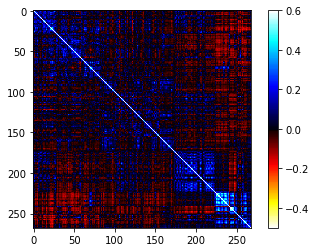

In [384]:
from matplotlib import colors
plt.imshow(np.mean(foo, axis=0)[np.argsort(shen_rsns.Network),:][:, np.argsort(shen_rsns.Network)],
          cmap=nilearn_cmaps['cold_hot_r'], 
          norm = colors.TwoSlopeNorm(vmin= -0.5,  vcenter=0, vmax = 0.6))
plt.colorbar()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

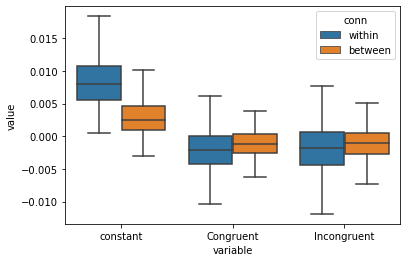

In [272]:
sns.boxplot(x='variable', y='value', hue='conn', 
            data = pd.concat([pd.melt(within_ef_msit, id_vars = ["task", "conn"]),
                       pd.melt(between_ef_msit, id_vars = ["task", "conn"])]),
           **{'showfliers':False})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

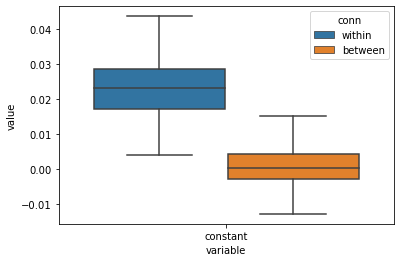

In [273]:
sns.boxplot(x='variable', y='value', hue='conn', 
            data = pd.concat([pd.melt(within_ef_rest, id_vars = ["task", "conn"]),
                       pd.melt(between_ef_rest, id_vars = ["task", "conn"])]),
           **{'showfliers':False})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

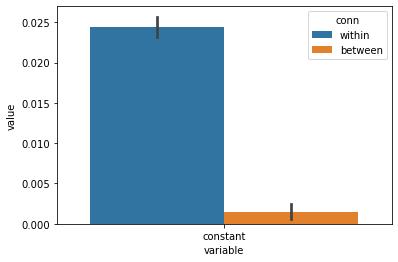

In [274]:
sns.barplot(x='variable', y='value', hue='conn', 
            data = pd.concat([pd.melt(within_ef_rest, id_vars = ["task", "conn"]),
                       pd.melt(between_ef_rest, id_vars = ["task", "conn"])]))

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

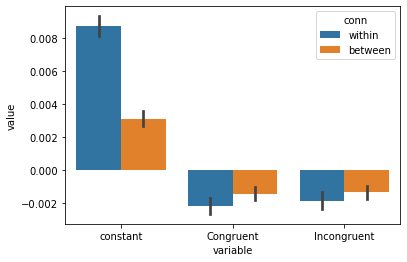

In [275]:
sns.barplot(x='variable', y='value', hue='conn', 
            data = pd.concat([pd.melt(within_ef_msit, id_vars = ["task", "conn"]),
                       pd.melt(between_ef_msit, id_vars = ["task", "conn"])]))

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='variable', ylabel='value'>

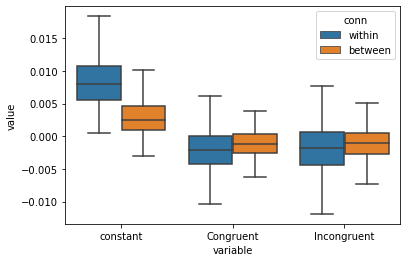

In [276]:
sns.boxplot(x='variable', y='value', hue='conn', 
            data = pd.concat([pd.melt(within_ef_msit, id_vars = ["task", "conn"]),
                       pd.melt(between_ef_msit, id_vars = ["task", "conn"])]),
           **{'showfliers':False})

In [ ]:
"../../results/first-level/edge_gsr/shen/task-stroop/sub-2049/constant/"

In [123]:
"../"

<IPython.core.display.Javascript object>